In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import gymnasium as gym
from gymnasium import spaces

In [2]:
data = pd.read_csv('^NSEI-2.csv')
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,04-01-2010,5200.899902,5238.450195,5167.100098,5232.200195,5232.200195,0.0
1,05-01-2010,5277.149902,5288.350098,5242.399902,5277.899902,5277.899902,0.0
2,06-01-2010,5278.149902,5310.850098,5260.049805,5281.799805,5281.799805,0.0
3,07-01-2010,5281.799805,5302.549805,5244.750000,5263.100098,5263.100098,0.0
4,08-01-2010,5264.250000,5276.750000,5234.700195,5244.750000,5244.750000,0.0
...,...,...,...,...,...,...,...
2341,24-06-2019,11725.799810,11754.000000,11670.200200,11699.650390,11699.650390,277600.0
2342,25-06-2019,11681.000000,11814.400390,11651.000000,11796.450200,11796.450200,300500.0
2343,26-06-2019,11768.150390,11871.849610,11757.549810,11847.549810,11847.549810,327900.0
2344,27-06-2019,11860.849610,11911.150390,11821.049810,11841.549810,11841.549810,480200.0


In [3]:
data['% Volatility'] = 100*(data['High'] - data['Low'])/data['Open']
data

,Date,Open,High,Low,Close,Adj Close,Volume,% Volatility
0,04-01-2010,5200.899902,5238.450195,5167.100098,5232.200195,5232.200195,0.0,1.371880
1,05-01-2010,5277.149902,5288.350098,5242.399902,5277.899902,5277.899902,0.0,0.870739
2,06-01-2010,5278.149902,5310.850098,5260.049805,5281.799805,5281.799805,0.0,0.962464
3,07-01-2010,5281.799805,5302.549805,5244.750000,5263.100098,5263.100098,0.0,1.094320
4,08-01-2010,5264.250000,5276.750000,5234.700195,5244.750000,5244.750000,0.0,0.798781
...,...,...,...,...,...,...,...,...
2341,24-06-2019,11725.799810,11754.000000,11670.200200,11699.650390,11699.650390,277600.0,0.714662
2342,25-06-2019,11681.000000,11814.400390,11651.000000,11796.450200,11796.450200,300500.0,1.398856
2343,26-06-2019,11768.150390,11871.849610,11757.549810,11847.549810,11847.549810,327900.0,0.971264
2344,27-06-2019,11860.849610,11911.150390,11821.049810,11841.549810,11841.549810,480200.0,0.759647


In [4]:
cleaned_data = data.dropna()
cleaned_data = cleaned_data.reset_index(drop=True)
cleaned_data


,Date,Open,High,Low,Close,Adj Close,Volume,% Volatility
0,04-01-2010,5200.899902,5238.450195,5167.100098,5232.200195,5232.200195,0.0,1.371880
1,05-01-2010,5277.149902,5288.350098,5242.399902,5277.899902,5277.899902,0.0,0.870739
2,06-01-2010,5278.149902,5310.850098,5260.049805,5281.799805,5281.799805,0.0,0.962464
3,07-01-2010,5281.799805,5302.549805,5244.750000,5263.100098,5263.100098,0.0,1.094320
4,08-01-2010,5264.250000,5276.750000,5234.700195,5244.750000,5244.750000,0.0,0.798781
...,...,...,...,...,...,...,...,...
2316,24-06-2019,11725.799810,11754.000000,11670.200200,11699.650390,11699.650390,277600.0,0.714662
2317,25-06-2019,11681.000000,11814.400390,11651.000000,11796.450200,11796.450200,300500.0,1.398856
2318,26-06-2019,11768.150390,11871.849610,11757.549810,11847.549810,11847.549810,327900.0,0.971264
2319,27-06-2019,11860.849610,11911.150390,11821.049810,11841.549810,11841.549810,480200.0,0.759647


In [5]:
cleaned_data.iloc[352]

Date             02-06-2011
Open            5529.899902
High            5568.200195
Low             5521.950195
Close           5550.350098
Adj Close       5550.350098
Volume                  0.0
% Volatility       0.836362
Name: 352, dtype: object

In [6]:
class StockTradingEnv(gym.Env):
    def __init__(self, data, initial_balance=1000000):
        super(StockTradingEnv, self).__init__()

        self.data = data  # Stock price data
        self.initial_balance = initial_balance
        self.balance = initial_balance
        self.shares_held = 0
        self.current_step = 0
        self.max_steps = len(data)-5
        self.current_price = self.data.loc[self.current_step,'Open']
        # Define action space (buy/sell quantity)
        self.action_space = spaces.Discrete(101)  # Values from -50 to +50

        # Define observation space (price, balance, shares_held)
        self.observation_space = spaces.Box(
            low=np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), high=np.array([np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf])
        )

    def reset(self ,*,seed = None, options = None):
        self.balance = self.initial_balance
        self.shares_held = 0
        self.current_step = 50
        self.no_steps = 0
        self.prev_net_worth = self.balance
        return self._get_observation(), {'Balance' : self.balance , 'Shares Held' : self.shares_held , 'Net Worth' : self.prev_net_worth}

    def step(self, action):
        action_value = action - 50  # Convert action to a range from -500 to +500
        self.current_price = self.data.loc[self.current_step,'Open']
        if action_value > 0:  # Buy action
            max_buy_amount = self.balance // self.current_price
            buy_amount = min(max_buy_amount, action_value)
            self.balance -= self.current_price * buy_amount
            self.shares_held += buy_amount

        elif action_value < 0:  # Sell action
            sell_amount = min(self.shares_held, -action_value)
            self.balance += self.current_price * sell_amount
            self.shares_held -= sell_amount

        self.net_worth = self.balance + self.shares_held*self.data.loc[self.current_step,'Close']
        self.current_step += 1
        self.no_steps += 1
        if self.current_step > self.max_steps:
            terminated = True
        else:
            terminated = False
        truncated = False
        reward = self._calculate_reward()
        info = {'Balance' : self.balance , 'Shares Held' : self.shares_held , 'Net Worth' : self.net_worth}
        return self._get_observation(), reward, terminated, truncated, info

    def _get_observation(self):
        observation = np.zeros(13)
        observation[0] = self.current_price
        volatility = 0
        for i in range(1,10):
            observation[i] = self.data.loc[self.current_step - i,'Close']
            volatility += self.data.loc[self.current_step - i, '% Volatility']
        volatility /= 9
        observation[10] = volatility
        observation[11] = self.balance
        observation[12] = self.shares_held
        observation = observation.astype(np.float32)
        return observation

    def _calculate_reward(self):
        reward = self.net_worth - self.prev_net_worth
        self.prev_net_worth = self.net_worth
        return reward

    def render(self, mode="human"):
        # Implement visualization of the environment if desired
        pass

    

In [7]:
from gym.envs.registration import register

register(
    id='Stocks-v1',
    entry_point='custom_env:StockTradingEnv',
)


In [74]:

# Example usage
if __name__ == "__main__":
    

    env = StockTradingEnv(cleaned_test_data)
    observation = env.reset()
    tot_reward = 0
    pos_reward =0
    neg_reward =0
    for j in range(100):
        action = np.random.randint(0,101)  # Sell 2000 stocks
        observation, reward, termiated, truncated, info = env.step(action)
        done = termiated or truncated
        print(j)
        print("Action:", action-50)
        print("Info:", info)
        print("Reward:", reward)
        print("Done:", done)
        print("----")
        tot_reward += reward
        if reward >= 0:
            pos_reward +=reward
        else:
            neg_reward += reward
    print("Total Reward:", tot_reward)
    print("Total Positive Reward:", pos_reward)
    print("Total Negative Reward:", neg_reward)
    print(env.action_space)
    print(env.observation_space)
    print(type(env.action_space))
    print(type(env.observation_space))


0
Action: 24
Info: {'Balance': 736316.80456, 'Shares Held': 24, 'Net Worth': 1002138.41392}
Reward: 2138.4139199999627
Done: False
----
1
Action: -40
Info: {'Balance': 1000193.1952, 'Shares Held': 0, 'Net Worth': 1000193.1952}
Reward: -1945.2187200000044
Done: False
----
2
Action: -34
Info: {'Balance': 1000193.1952, 'Shares Held': 0, 'Net Worth': 1000193.1952}
Reward: 0.0
Done: False
----
3
Action: 48
Info: {'Balance': 478298.80431999994, 'Shares Held': 48, 'Net Worth': 998650.0230399999}
Reward: -1543.1721600000747
Done: False
----
4
Action: -2
Info: {'Balance': 499989.2047199999, 'Shares Held': 46, 'Net Worth': 992409.9959799999}
Reward: -6240.027059999993
Done: False
----
5
Action: 33
Info: {'Balance': 145344.8109899999, 'Shares Held': 79, 'Net Worth': 1036006.6267899999}
Reward: 43596.63081
Done: False
----
6
Action: -3
Info: {'Balance': 179972.91158999992, 'Shares Held': 76, 'Net Worth': 1061588.12679}
Reward: 25581.5
Done: False
----
7
Action: 30
Info: {'Balance': 6112.4085899999

In [9]:
# Importing the optimzation frame - HPO
import optuna
# PPO algo for RL
from stable_baselines3 import PPO
# Bring in the eval policy method for metric calculation
from stable_baselines3.common.evaluation import evaluate_policy
# Import the sb3 monitor for logging 
from stable_baselines3.common.monitor import Monitor
# Import the vec wrappers to vectorize and frame stack
from stable_baselines3.common.vec_env import DummyVecEnv, VecFrameStack
# Import os to deal with filepaths
import os

In [10]:
LOG_DIR = './logs/'
OPT_DIR = './opt/'

In [11]:
# Function to return test hyperparameters - define the object function
def optimize_ppo(trial): 
    return {
        'n_steps':trial.suggest_int('n_steps', 2048, 8192),
        'gamma':trial.suggest_loguniform('gamma', 0.8, 0.9999),
        'learning_rate':trial.suggest_loguniform('learning_rate', 1e-6, 1e-3),
        'clip_range':trial.suggest_uniform('clip_range', 0.1, 0.4),
        'gae_lambda':trial.suggest_uniform('gae_lambda', 0.8, 0.99)
    }

In [17]:
SAVE_PATH = os.path.join(OPT_DIR, 'trial_{}_best_model'.format(1))

In [18]:
def optimize_agent(trial):
    #try:
        model_params = optimize_ppo(trial) 

        # Create environment 
        env = StockTradingEnv(cleaned_data)
        env = Monitor(env, LOG_DIR)
        env = DummyVecEnv([lambda: env])

        # Create algo 
        model = PPO('MlpPolicy', env, tensorboard_log=LOG_DIR, verbose=0, **model_params)
        model.learn(total_timesteps=25000)
        #model.learn(total_timesteps=100000)

        # Evaluate model 
        mean_reward, _ = evaluate_policy(model, env, n_eval_episodes=5)
        env.close()

        SAVE_PATH = os.path.join(OPT_DIR, 'trial_{}_best_model'.format(trial.number))
        model.save(SAVE_PATH)

        return mean_reward

In [19]:
study = optuna.create_study(direction='maximize')
study.optimize(optimize_agent, n_trials=10, n_jobs=1)

[I 2023-08-24 13:56:56,575] A new study created in memory with name: no-name-b37d14ab-1564-4a52-ac86-e3fbdf91dbdf
C:\Users\jay\AppData\Local\Temp\ipykernel_57164\147916700.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma':trial.suggest_loguniform('gamma', 0.8, 0.9999),
C:\Users\jay\AppData\Local\Temp\ipykernel_57164\147916700.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate':trial.suggest_loguniform('learning_rate', 1e-6, 1e-3),
C:\Users\jay\AppData\Local\Temp\ipykernel_57164\147916700.py:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v

In [20]:
study.best_params

{'n_steps': 6276,
 'gamma': 0.8811640846366772,
 'learning_rate': 3.815429096693661e-05,
 'clip_range': 0.21082580131089468,
 'gae_lambda': 0.8391465016346003}

In [21]:
from stable_baselines3.common.env_checker import check_env
env = StockTradingEnv(cleaned_data)
check_env(env)

In [22]:
study.best_trial

FrozenTrial(number=2, state=1, values=[1242666.242753], datetime_start=datetime.datetime(2023, 8, 24, 13, 58, 2, 236021), datetime_complete=datetime.datetime(2023, 8, 24, 13, 58, 30, 594468), params={'n_steps': 6276, 'gamma': 0.8811640846366772, 'learning_rate': 3.815429096693661e-05, 'clip_range': 0.21082580131089468, 'gae_lambda': 0.8391465016346003}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'n_steps': IntDistribution(high=8192, log=False, low=2048, step=1), 'gamma': FloatDistribution(high=0.9999, log=True, low=0.8, step=None), 'learning_rate': FloatDistribution(high=0.001, log=True, low=1e-06, step=None), 'clip_range': FloatDistribution(high=0.4, log=False, low=0.1, step=None), 'gae_lambda': FloatDistribution(high=0.99, log=False, low=0.8, step=None)}, trial_id=2, value=None)

In [11]:
model = PPO.load(os.path.join(OPT_DIR, 'trial_2_best_model.zip'))

In [12]:
from stable_baselines3.common.callbacks import BaseCallback

In [13]:
class TrainAndLoggingCallback(BaseCallback):

    def __init__(self, check_freq, save_path, verbose=1):
        super(TrainAndLoggingCallback, self).__init__(verbose)
        self.check_freq = check_freq
        self.save_path = save_path

    def _init_callback(self):
        if self.save_path is not None:
            os.makedirs(self.save_path, exist_ok=True)

    def _on_step(self):
        if self.n_calls % self.check_freq == 0:
            model_path = os.path.join(self.save_path, 'best_model_{}'.format(self.n_calls))
            self.model.save(model_path)

        return True

In [14]:
CHECKPOINT_DIR = './train/'

In [15]:
callback = TrainAndLoggingCallback(check_freq=10000, save_path=CHECKPOINT_DIR)

In [77]:
env = StockTradingEnv(cleaned_test_data)
env = Monitor(env, LOG_DIR)
env = DummyVecEnv([lambda: env])

In [17]:
#model_params = study.best_params
model_params = {'n_steps': 6276,
 'gamma': 0.8811640846366772,
 'learning_rate': 3.815429096693661e-05,
 'clip_range': 0.21082580131089468,
 'gae_lambda': 0.8391465016346003}
model_params['n_steps'] = 6272  # set n_steps to 7488 or a factor of 64
# model_params['learning_rate'] = 5e-7
model_params

{'n_steps': 6272,
 'gamma': 0.8811640846366772,
 'learning_rate': 3.815429096693661e-05,
 'clip_range': 0.21082580131089468,
 'gae_lambda': 0.8391465016346003}

In [18]:
model = PPO('MlpPolicy', env, tensorboard_log=LOG_DIR, verbose=1, **model_params)

Using cpu device


In [19]:
# Reload previous weights from HPO
model.load(os.path.join(OPT_DIR, 'trial_2_best_model.zip'))

In [20]:
model.learn(total_timesteps=3000000, callback=callback)

Logging to ./logs/PPO_80
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 2.27e+03 |
|    ep_rew_mean     | 5.3e+05  |
| time/              |          |
|    fps             | 1949     |
|    iterations      | 1        |
|    time_elapsed    | 3        |
|    total_timesteps | 6272     |
---------------------------------
-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 2.27e+03      |
|    ep_rew_mean          | 6.13e+05      |
| time/                   |               |
|    fps                  | 1267          |
|    iterations           | 2             |
|    time_elapsed         | 9             |
|    total_timesteps      | 12544         |
| train/                  |               |
|    approx_kl            | 1.3511609e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.211         |
|    entropy_loss         | -4.62         |
|    explained_vari

In [21]:
model = PPO.load('./opt/trial_2_best_model.zip')
mean_reward, _ = evaluate_policy(model, env, render=False, n_eval_episodes=1)
mean_reward

1242666.242753

In [142]:
obs= env.reset()
action = model.predict(obs)[0]
print(obs)
#print(info)
action

[[1.5862800e+04 1.0982800e+04 1.1035700e+04 1.1003050e+04 1.0946200e+04
  1.0847900e+04 1.0844650e+04 1.0797900e+04 1.1023250e+04 1.0948300e+04
  1.0826904e+00 1.0000000e+06 0.0000000e+00]]


array([16], dtype=int64)

In [143]:
obs, reward, done, info = env.step(action)
reward

array([0.], dtype=float32)

In [144]:
info

[{'Balance': 1000000.0,
  'Shares Held': 0,
  'Net Worth': 1000000.0,
  'TimeLimit.truncated': False}]

In [145]:
# Reset game to starting state
obs = env.reset()
# Set flag to flase
done = False
tot_rew = 0
pos_reward = 0
neg_reward = 0
net_worth = []
shares_held = []
rewards = []
actions = []
for game in range(1): 
    while not done: 
        action = model.predict(obs)[0]
        obs, reward, done, info = env.step(action)
        print("Action:", action-50)
        actions.append(action-50)
        print("Info:", info)
        net_worth.append(info[0]["Net Worth"])
        shares_held.append(info[0]["Shares Held"])
        print("Reward:", reward)
        rewards.append(reward[0])
        print("Done:", done)
        print("----")
        tot_rew += reward
        if reward >= 0:
            pos_reward +=reward
        else:
            neg_reward += reward
print(info)
print(tot_rew)
print(pos_reward)
print(neg_reward)
        

Action: [26]
Info: [{'Balance': 714343.20494, 'Shares Held': 26, 'Net Worth': 1002316.6150799999, 'TimeLimit.truncated': False}]
Reward: [2316.615]
Done: [False]
----
Action: [49]
Info: [{'Balance': 175595.57405000005, 'Shares Held': 75, 'Net Worth': 1000858.07405, 'TimeLimit.truncated': False}]
Reward: [-1458.541]
Done: [False]
----
Action: [-8]
Info: [{'Balance': 263596.37093000003, 'Shares Held': 67, 'Net Worth': 988375.5448, 'TimeLimit.truncated': False}]
Reward: [-12482.529]
Done: [False]
----
Action: [19]
Info: [{'Balance': 57013.174540000036, 'Shares Held': 86, 'Net Worth': 989309.1080800002, 'TimeLimit.truncated': False}]
Reward: [933.5633]
Done: [False]
----
Action: [-15]
Info: [{'Balance': 219691.17754000003, 'Shares Held': 71, 'Net Worth': 979731.9640500001, 'TimeLimit.truncated': False}]
Reward: [-9577.144]
Done: [False]
----
Action: [8]
Info: [{'Balance': 133716.77906000003, 'Shares Held': 79, 'Net Worth': 1024378.5948600001, 'TimeLimit.truncated': False}]
Reward: [44646.6

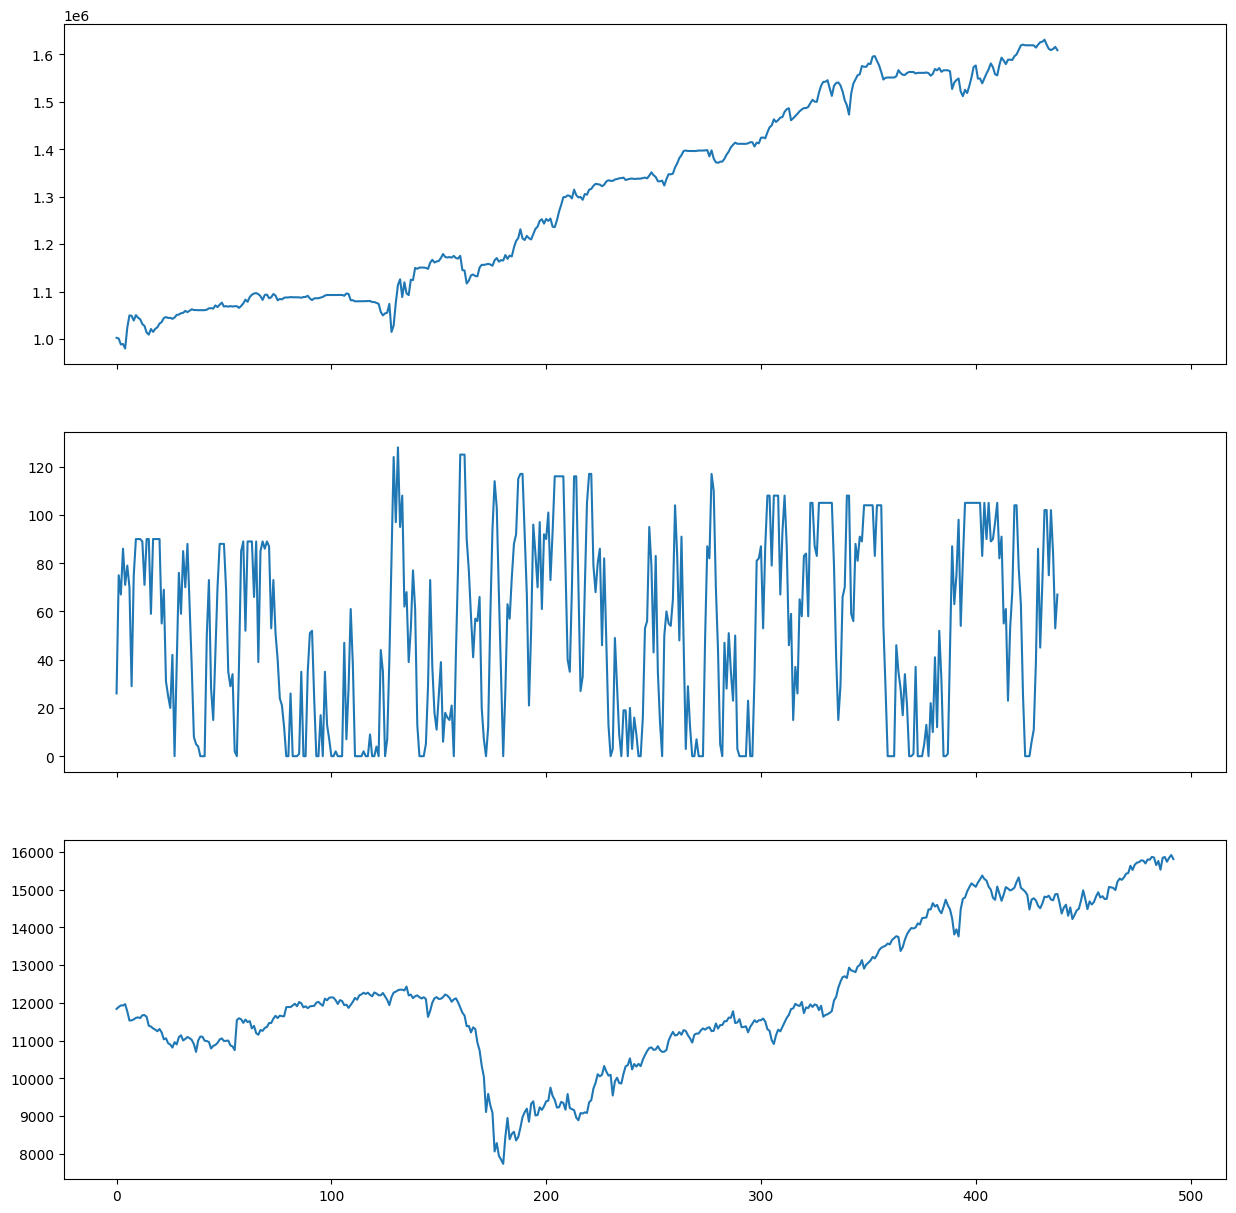

In [146]:
fig, (ax1,ax2,ax3) = plt.subplots(3,1,figsize=(15,15),sharex=True)
ax1.plot(net_worth)
ax2.plot(shares_held)
ax3.plot(cleaned_test_data['Open'])
plt.show()

In [71]:
test_data = pd.read_csv("^NSEI-1.csv")

In [72]:
test_data['% Volatility'] = 100*(test_data['High'] - test_data['Low'])/test_data['Open']
cleaned_test_data = test_data.dropna()
cleaned_test_data = cleaned_test_data.reset_index(drop=True)